# Machine Learning for Biomedical Data with Python
## Code 5.1 Classification Problem
Realize Classification to Data Sets

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Importing Data

#### From a .csv file

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [4]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Visualizing the data

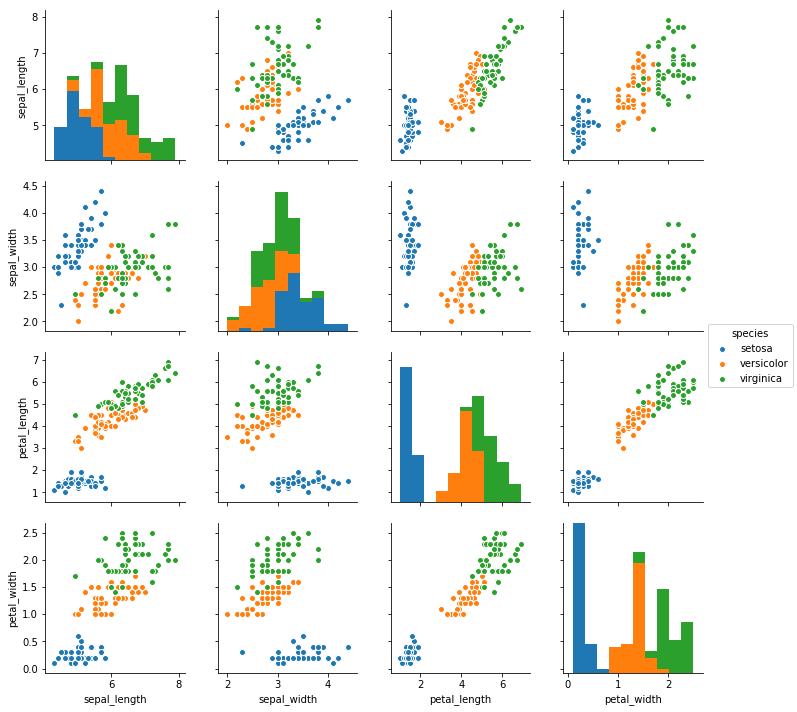

In [5]:
import seaborn as sns
sns.pairplot(data, hue='species', markers='o')
plt.show()

### From online server

In [6]:
from sklearn import neighbors, datasets
dataset = datasets.load_iris()

In [7]:
dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Defining Features and Targets

In [8]:
features, target = dataset.data, dataset.target

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Spliting the data

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=5)

In [11]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
49,5.0,3.3,1.4,0.2
43,5.0,3.5,1.6,0.6
135,7.7,3.0,6.1,2.3
40,5.0,3.5,1.3,0.3
115,6.4,3.2,5.3,2.3


In [12]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 1])

# Discriminant Analysis

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [54]:
model = LinearDiscriminantAnalysis()
#model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
print('Accuracy of classifier on training set: {:.2f}' .format(model.score(x_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.93


Selecting the first two features

In [56]:
X1 = x_train[['sepal_length','sepal_width']]
Y1 = y_train

Plotting decision regions

In [57]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = .02
# calculate min, max and limits
x_min, x_max = X1['sepal_length'].min() - 1, X1['sepal_length'].max() + 1
y_min, y_max = X1['sepal_width'].min() - 1, X1['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [58]:
from sklearn.metrics import accuracy_score
model.fit(X1,Y1)
X_test = x_test[['sepal_length','sepal_width']]
Y_test = y_test
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.8


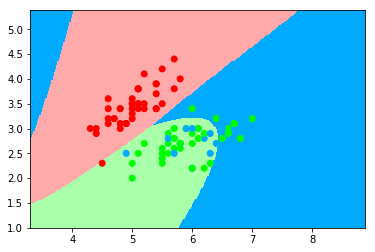

In [59]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X1['sepal_length'], X1['sepal_width'], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Classification - k-nearest neighbors vote

In [60]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier(n_neighbors=5)

In [61]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
predictions=classifier.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9333333333333333


Selecting the first two features

In [64]:
X2 = x_train[['sepal_length','sepal_width']]
Y2 = y_train

Plotting decision regions

In [65]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = .02
# calculate min, max and limits
x_min, x_max = X2['sepal_length'].min() - 1, X2['sepal_length'].max() + 1
y_min, y_max = X2['sepal_width'].min() - 1, X2['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [66]:
classifier.fit(X2,Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
X_test = x_test[['sepal_length','sepal_width']]
Y_test = y_test
predictions=classifier.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.8


In [68]:
# predict class using data and kNN classifier
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

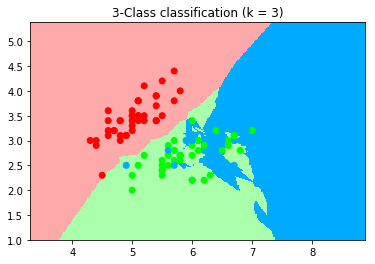

In [69]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
n_neighbors = 3
# Plot also the training points
plt.scatter(X2['sepal_length'], X2['sepal_width'], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()